Exercise

1.Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.

2.Figure out if any preprocessing such as scaling would help here

3.Draw elbow plot and from that figure out optimal value of k

In [172]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [173]:
iris['feature_names']
df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
df['target']=iris['target']
final_df=df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')
final_df['target_names']=final_df['target'].apply(lambda x: iris['target_names'][x])
final_df

,petal length (cm),petal width (cm),target,target_names
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa
...,...,...,...,...
145,5.2,2.3,2,virginica
146,5.0,1.9,2,virginica
147,5.2,2.0,2,virginica
148,5.4,2.3,2,virginica


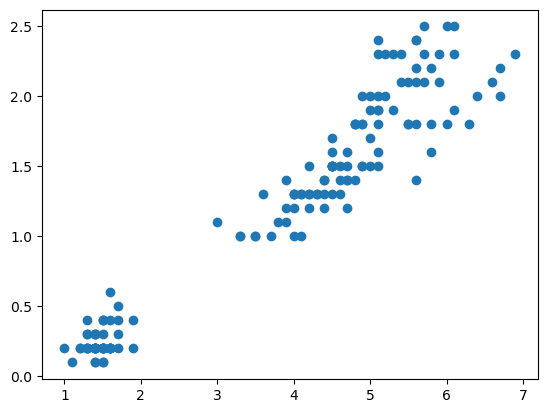

In [174]:
plt.scatter(final_df['petal length (cm)'],final_df['petal width (cm)'])
plt.show()

It Seems that K=2 will be best for clustering. Let's see what will be indicated by Elbow plot

Scaling both parameters equally by MinMaxScaler

In [175]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(final_df[['petal length (cm)']])
final_df['petal length (cm)']=scaler.transform(final_df[['petal length (cm)']])

scaler.fit(final_df[['petal width (cm)']])
final_df['petal width (cm)']=scaler.transform(final_df[['petal width (cm)']])

final_df

,petal length (cm),petal width (cm),target,target_names
0,0.067797,0.041667,0,setosa
1,0.067797,0.041667,0,setosa
2,0.050847,0.041667,0,setosa
3,0.084746,0.041667,0,setosa
4,0.067797,0.041667,0,setosa
...,...,...,...,...
145,0.711864,0.916667,2,virginica
146,0.677966,0.750000,2,virginica
147,0.711864,0.791667,2,virginica
148,0.745763,0.916667,2,virginica


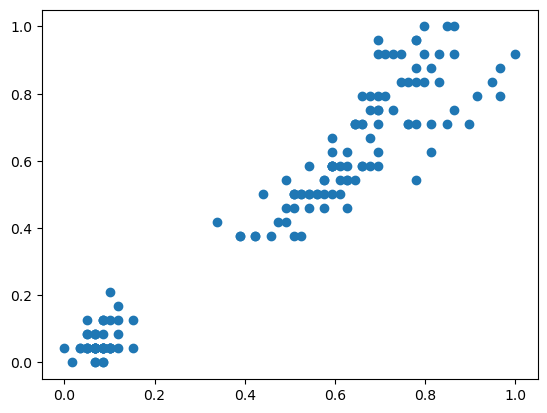

In [176]:
plt.scatter(final_df['petal length (cm)'],final_df['petal width (cm)'])
plt.show()

ELBOW PLOT USING SSE AND FINDING THE MOST SUITABLE K

c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

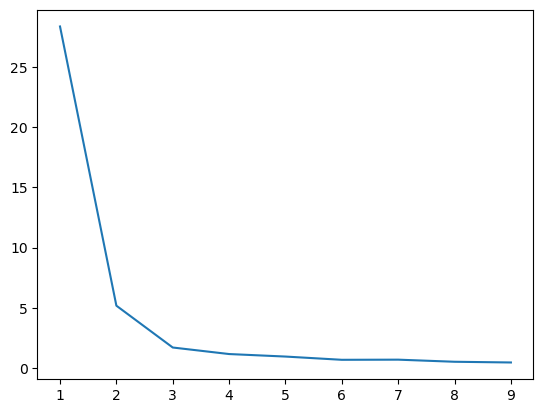

In [177]:
sse=[] #sum of square error
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(final_df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

k_range=range(1,10)  
plt.plot(k_range,sse)
plt.show()

K=2 or K=3 both will be fit . So I am using one after another

K=2

c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


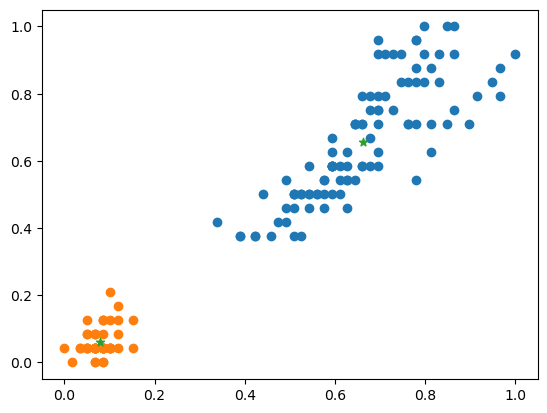

In [178]:
km1=KMeans(n_clusters=2)
y_predicted_1=km1.fit_predict(final_df[['petal length (cm)','petal width (cm)']])
final_df['result_1']=y_predicted_1
df1=final_df[final_df['result_1']==0]
df2=final_df[final_df['result_1']==1]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'])
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],marker='*')
plt.show()

K=3

c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


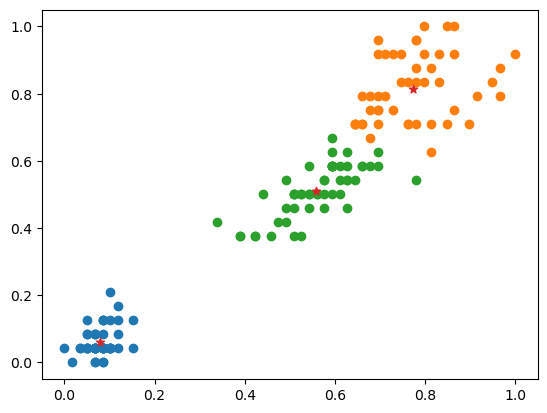

In [179]:
km2=KMeans(n_clusters=3)
y_predicted_2=km2.fit_predict(final_df[['petal length (cm)','petal width (cm)']])
final_df['result_2']=y_predicted_2
print(y_predicted_2)
df3=final_df[final_df['result_2']==0]
df4=final_df[final_df['result_2']==1]
df5=final_df[final_df['result_2']==2]
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'])
plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'])
plt.scatter(df5['petal length (cm)'],df5['petal width (cm)'])
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],marker='*')
plt.show()